# Dutch Political Parties about Refugees

### LSDP - Group 5 - RQ 4 by Julotte van der Beek (11338326)

### Table of Contents

* 6.1. [Introduction research question](#1.-Introduction-research-question)
    * 6.1.1. [Motivation](#6.1.1-Motivation)
    * 6.1.2. [Related literature](#6.1.2.-Related-Literature)
* 6.2. [Experimental Setup](#6.2.-Experimental-Setup)
    * 6.2.1. [Dataset Preprocessing](#6.2.1.-Dataset-Preprocessing)
    * 6.2.2. [Approach](#6.2.2.-Approach)
    * 6.2.3. [Implementation](#6.2.3.-Implementation)
* 6.3. [Evaluation](#6.3.-Evaluation)
    * 6.3.1. [Results](#6.3.1.-Results)
* 6.4. [Discussion](#6.4.-Discussion)
    * 6.4.1. [Conclusion](#6.4.1.-Conclusion)
    * 6.4.2. [Discussion results and suggestions future work](#6.4.2.-Discussion-results-and-suggestions-future-work)
    * 6.4.3. [Lessons learned](#6.4.3.-Lessons-learned)

# 6. RQ4 - Dutch Parties about Refugees

## 6.1. Introduction in Research Question
With the upcoming elections in mind on the 17th of March 2021, the Dutch politicians are spreading their opinion on the big topics such as education, the economy and migration. In the election programme the parties release for the upcoming elections are all big topics covered, with the parties opinion about the topic. One of the big topics, migration, is what this research question is all about. With the fourth question __“Which political parties do talk positive or negative about accepting refugees?”__, the goal is to show if political parties really do talk positive or negative throughout the past years about accepting refugees as they say they will do in their election programme.  

### 6.1.1 Motivation

### 6.1.2. Related Literature
- Writing part about pattern 
- writing about sentiment 


## 6.2.  Experimental Setup
The Pattern library is a multipurpose library capable of handling tasks like giving a sentiment weight to words and sentences. The pattern.nl module contains a fast part-of-speech tagger for Dutch (identifies nouns, adjectives, verbs, etc. in a sentence), sentiment analysis, and tools for Dutch verb conjugation and noun singularization & pluralization. To run pattern there it must be downloaden first into the computer (explained in the steps below). Also there is a need to install Matplotlib, pandas and Numpy.
<code>
pip install pandas
pip install numpy
pip install matplotlib</code>

In [36]:
import lxml
import lxml.etree as ET
import os
import re

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
from pattern.nl import sentiment

When running pattern on a MacBook device, there could be problems with installing. If the Python3 does not work, the code could be running in a p36workshop environment. When installing this, work from a -bash terminal.

<code>
conda create -n p36workshop python=3.6 ipykernel jupyter anaconda
conda activate p36workshop
python kernel install --name p36workshop —user
conda config --add channels conda-forge
conda install pattern </code>
    
When installed, open Anaconda-Navigator and go to environments, select p36workshop and open a jupyter notebook. Now, when importing sentiment, from pattern.nl there must be no error anymore.

### 6.2.1. Dataset Preprocessing 

The dataset that will be used for this RQ, is the same as for the other three. The ParlaMint dataset will contain 5198 files from 2014 to 2020. The files that are used in this RQ are the files that contain the keywords (later more about how the keywords are selected). The last file in the full_dataset_output_second_pass_16_01 folder is the ParlaMint-NL.xml, which contains information about the speakers and their parties. In the preprocessing the speakers will be matched to the parties, for later use in the RQ. The try is used, because some people in the Dutch  House of Representatives do not have a party, but still have their seat from when they left their old party. 

In [48]:
teksten = {'#reference':{},'#covid':{}}
directory = os.listdir('full_dataset_output_second_pass_16_01')
for i in sorted(directory):
    if i == 'ParlaMint-NL.xml':
        continue
    i = os.path.join('full_dataset_output_second_pass_16_01', i)
    tree = ET.parse(i)
    root = tree.getroot()
    tijd = root.attrib['ana']
    
    for text in root.iter('{http://www.tei-c.org/ns/1.0}u'):
        if text.attrib['ana'] == '#chair':
            continue
        
        for seg in text.findall('{http://www.tei-c.org/ns/1.0}seg'):
            if tijd == '#reference':
                if namen[text.attrib['who'][1:]] in teksten[tijd].keys():
                    teksten[tijd][namen[text.attrib['who'][1:]]].append(seg.text)
                else:
                    teksten[tijd][namen[text.attrib['who'][1:]]] = [seg.text]
            
            else:
                if namen[text.attrib['who'][1:]] in teksten[tijd].keys():
                    teksten[tijd][namen[text.attrib['who'][1:]]].append(seg.text)
                else:
                    teksten[tijd][namen[text.attrib['who'][1:]]] = [seg.text]

In [50]:
tree = ET.parse('ParlaMint-NL.xml')
root = tree.getroot()
namen = {}
partijen = []
for j in root.iter('{http://www.tei-c.org/ns/1.0}person'):
    naam = j.attrib['{http://www.w3.org/XML/1998/namespace}id']
    try:
        partij = j.find('{http://www.tei-c.org/ns/1.0}affiliation').attrib['ref'][7:]
    except AttributeError:
        partij = None
    except KeyError:
        partij = 'Chair'
    if partij not in partijen:
        partijen.append(partij)
    namen[naam] = partij

The data now looks like, when you enter a name, the party of the name which is entered is shown:

In [51]:
print(partijen)
print(namen['SigridKaag'])

['Chair', 'VVD', 'SP', 'PvdA', 'CDA', 'PvdD', 'PVV', 'GroenLinks', 'SGP', 'D66', 'ChristenUnie', '50PLUS', None, 'OSF', 'DENK', 'Van Vliet', 'Groep Bontes/Van Klaveren', 'Houwers', 'Klein', 'Griffier', 'EP/VVD', 'EP/PvdA', 'EP/SP', 'EP/CDA', 'EP/D66', 'EP/GroenLinks', 'EP/CU/SGP', 'EP/PvdD', 'FvD', 'vanPareren']
D66


### 6.2.2. Approach

The approach that will be used to find an answer to the research question, is first collection a set of keywords about refugees. When this set of keywords is collected the keywords will help making a smaller dataset, with only the sentences about refugees in it. Later this sentences can be analyzed with the sentiment package from pattern.nl, and be linked back to the party who said it. So to display the approach short: 
* Find keywords 
* Collect the sentences with a keyword in it and make a smaller dataset
* Use sentiment scores to model the opinions from parties about refugees    

### 6.2.3. Implementation

To find the keywords which are relevant with the term refugee (vluchteling), this research question used the website www.rijksoverheid.nl and www.synoniemen.net. From this sites came clear that ‘vluchteling’, ‘asielzoeker’ and ‘immigrant’ are the top 3 most used Dutch words when people speak about refugees. With this information, the list keywords is created. In the next piece of code scans all the 5189 documents in the dataset for the keywords. 

In [52]:
def word_counter(word):
    counter = 0
    word_count = {}
    directory = os.listdir('full_dataset_output_second_pass_16_01')
    for filename in sorted(directory):
        filepath = os.path.join('full_dataset_output_second_pass_16_01', filename)
        with open(filepath, 'r') as fp:
            for line in fp:
                line = line.lower()
                counter += line.count(word)
    print("Number of times the word {} appears in the dataset: {}".format(word, counter))

keywords = ['vluchtelingen', 'vluchteling', 'immigranten', 'immigrant', 'asielzoekers', 'asielzoeker']


for i in keywords:
    word_counter(i)

Number of times the word vluchtelingen appears in the dataset: 7124
Number of times the word vluchteling appears in the dataset: 7547
Number of times the word immigranten appears in the dataset: 326
Number of times the word immigrant appears in the dataset: 344
Number of times the word asielzoekers appears in the dataset: 3725
Number of times the word asielzoeker appears in the dataset: 4258


The code below is the same as above, but makes a plot. I am still figuring out how to make it in a def and make it cleaner. 

In [53]:
directory = os.listdir('full_dataset_output_second_pass_16_01')
count_vluchteling = 0
count_vluchtelingen = 0
count_immigrant = 0
count_immigranten = 0
count_asielzoeker = 0
count_asielzoekers = 0
for filename in sorted(directory):
    filepath = os.path.join('full_dataset_output_second_pass_16_01', filename)
    with open(filepath, 'r') as fp:
        for line in fp:
            line = line.lower()
            #String to search for:
            count_vluchteling += line.count('vluchteling')
            count_vluchtelingen += line.count('vluchtelingen')
            count_immigrant += line.count('immigrant')
            count_immigranten += line.count('immigranten')
            count_asielzoeker += line.count('asielzoeker')
            count_asielzoekers += line.count('asielzoekers')

totaal_vlucht = count_vluchteling + count_vluchtelingen
totaal_immi = count_immigrant + count_immigranten
totaal_asiel = count_asielzoeker + count_asielzoekers

print("vluchteling:", count_vluchteling)
print("vluchtelingen:", count_vluchtelingen)
print("Number of times the word vluchteling(en) appears in the dataset:", totaal_vlucht)
print("immigrant:", count_immigrant)
print("immigranten:", count_immigranten)
print("Number of times the word immigrant(en) appears in the dataset:", totaal_immi)
print("asielzoeker:", count_asielzoeker)
print("asielzoekers:", count_asielzoekers)
print("Number of times the word asielzoeker(s) appears in the dataset:", totaal_asiel)

vluchteling: 7547
vluchtelingen: 7124
Number of times the word vluchteling(en) appears in the dataset: 14671
immigrant: 344
immigranten: 326
Number of times the word immigrant(en) appears in the dataset: 670
asielzoeker: 4258
asielzoekers: 3725
Number of times the word asielzoeker(s) appears in the dataset: 7983


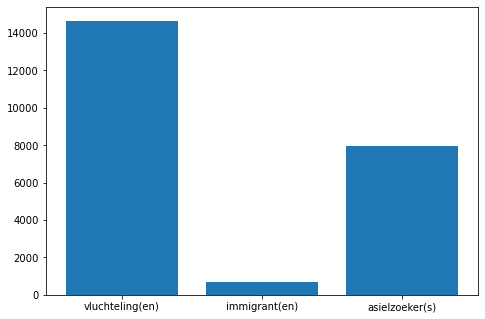

In [54]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['vluchteling(en)', 'immigrant(en)', 'asielzoeker(s)']
students = [totaal_vlucht, totaal_immi, totaal_asiel]
ax.bar(langs,students)
plt.show()

The keywords are decided and count, now let's see in which years refugees where the highest priority with the Dutch Politicians.

In [55]:
c_v_2014 = c_i_2014 = c_a_2014 = 0
c_v_2015 = c_i_2015 = c_a_2015 = 0
c_v_2016 = c_i_2016 = c_a_2016 = 0
c_v_2017 = c_i_2017 = c_a_2017 = 0
c_v_2018 = c_i_2018 = c_a_2018 = 0
c_v_2019 = c_i_2019 = c_a_2019 = 0
c_v_2020 = c_i_2020 = c_a_2020 = 0
l_2014 = ["2014"]
l_2015 = ["2015"]
l_2016 = ["2016"]
l_2017 = ["2017"]
l_2018 = ["2018"]
l_2019 = ["2019"]
l_2020 = ["2020"]
totaal_v = []
totaal_i = []
totaal_a = []
for filename in sorted(directory):
    filepath = os.path.join('full_dataset_output_second_pass_16_01', filename)
    for i in l_2014:
        if i in filename:
            with open(filepath, 'r') as fp:
                for line in fp:
                    c_v_2014 += line.count('vluchteling')
                    c_v_2014 += line.count('vluchtelingen')
                    c_v_2014 += line.count('Vluchteling')
                    c_i_2014 += line.count('immigrant')
                    c_i_2014 += line.count('Immigrant')
                    c_i_2014 += line.count('immigranten')
                    c_a_2014 += line.count('asielzoeker')
                    c_a_2014 += line.count('Asielzoeker')
                    c_a_2014 += line.count('asielzoekers')
    for i in l_2015:
        if i in filename:
            with open(filepath, 'r') as fp:
                for line in fp:
                    c_v_2015 += line.count('vluchteling')
                    c_v_2015 += line.count('vluchtelingen')
                    c_v_2015 += line.count('Vluchteling')
                    c_i_2015 += line.count('immigrant')
                    c_i_2015 += line.count('Immigrant')
                    c_i_2015 += line.count('immigranten')
                    c_a_2015 += line.count('asielzoeker')
                    c_a_2015 += line.count('Asielzoeker')
                    c_a_2015 += line.count('asielzoekers')
    for i in l_2016:
        if i in filename:
            with open(filepath, 'r') as fp:
                for line in fp:
                    c_v_2016 += line.count('vluchteling')
                    c_v_2016 += line.count('vluchtelingen')
                    c_v_2016 += line.count('Vluchteling')
                    c_i_2016 += line.count('immigrant')
                    c_i_2016 += line.count('Immigrant')
                    c_i_2016 += line.count('immigranten')
                    c_a_2016 += line.count('asielzoeker')
                    c_a_2016 += line.count('Asielzoeker')
                    c_a_2016 += line.count('asielzoekers')
    for i in l_2017:
        if i in filename:
            with open(filepath, 'r') as fp:
                for line in fp:
                    c_v_2017 += line.count('vluchteling')
                    c_v_2017 += line.count('vluchtelingen')
                    c_v_2017 += line.count('Vluchteling')
                    c_i_2017 += line.count('immigrant')
                    c_i_2017 += line.count('Immigrant')
                    c_i_2017 += line.count('immigranten')
                    c_a_2017 += line.count('asielzoeker')
                    c_a_2017 += line.count('Asielzoeker')
                    c_a_2017 += line.count('asielzoekers')
    for i in l_2018:
        if i in filename:
            with open(filepath, 'r') as fp:
                for line in fp:
                    c_v_2018 += line.count('vluchteling')
                    c_v_2018 += line.count('vluchtelingen')
                    c_v_2018 += line.count('Vluchteling')
                    c_i_2018 += line.count('immigrant')
                    c_i_2018 += line.count('Immigrant')
                    c_i_2018 += line.count('immigranten')
                    c_a_2018 += line.count('asielzoeker')
                    c_a_2018 += line.count('Asielzoeker')
                    c_a_2018 += line.count('asielzoekers')
    for i in l_2019:
        if i in filename:
            with open(filepath, 'r') as fp:
                for line in fp:
                    c_v_2019 += line.count('vluchteling')
                    c_v_2019 += line.count('vluchtelingen')
                    c_v_2019 += line.count('Vluchteling')
                    c_i_2019 += line.count('immigrant')
                    c_i_2019 += line.count('Immigrant')
                    c_i_2019 += line.count('immigranten')
                    c_a_2019 += line.count('asielzoeker')
                    c_a_2019 += line.count('Asielzoeker')
                    c_a_2019 += line.count('asielzoekers')
    for i in l_2020:
        if i in filename:
            with open(filepath, 'r') as fp:
                for line in fp:
                    c_v_2020 += line.count('vluchteling')
                    c_v_2020 += line.count('vluchtelingen')
                    c_v_2020 += line.count('Vluchteling')
                    c_i_2020 += line.count('immigrant')
                    c_i_2020 += line.count('Immigrant')
                    c_i_2020 += line.count('immigranten')
                    c_a_2020 += line.count('asielzoeker')
                    c_a_2020 += line.count('Asielzoeker')
                    c_a_2020 += line.count('asielzoekers')
totaal_v.append(c_v_2014)
totaal_i.append(c_i_2014)
totaal_a.append(c_a_2014)
totaal_v.append(c_v_2015)
totaal_i.append(c_i_2015)
totaal_a.append(c_a_2015)
totaal_v.append(c_v_2016)
totaal_i.append(c_i_2016)
totaal_a.append(c_a_2016)
totaal_v.append(c_v_2017)
totaal_i.append(c_i_2017)
totaal_a.append(c_a_2017)
totaal_v.append(c_v_2018)
totaal_i.append(c_i_2018)
totaal_a.append(c_a_2018)
totaal_v.append(c_v_2019)
totaal_i.append(c_i_2019)
totaal_a.append(c_a_2019)
totaal_v.append(c_v_2020)
totaal_i.append(c_i_2020)
totaal_a.append(c_a_2020)
print(totaal_v, totaal_i, totaal_a)

[0, 5477, 4093, 1393, 1544, 925, 588] [0, 130, 72, 88, 189, 93, 95] [28, 3197, 1711, 950, 563, 925, 536]


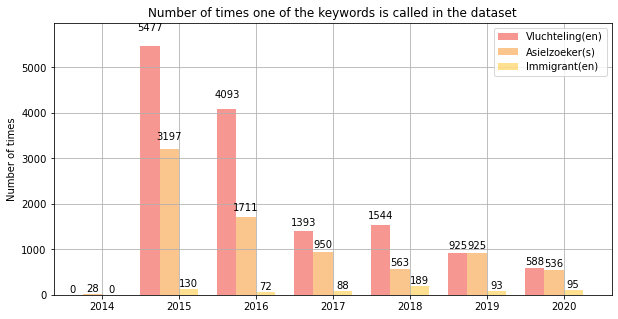

In [56]:
labels = ['2014', '2015', '2016', '2017', '2018', '2019', '2020']
pos = list(range(len(totaal_v))) 
width = 0.25 
fig, ax = plt.subplots(figsize=(10,5))

bar_1 = plt.bar(pos, totaal_v, width, alpha=0.5, color='#EE3224', label="Vluchtelingen") 
bar_2 = plt.bar([p + width for p in pos], totaal_a, width, alpha=0.5, color='#F78F1E', label="Asielzoekers") 
bar_3 = plt.bar([p + width*2 for p in pos], totaal_i, width, alpha=0.5, color='#FFC222', label="Immigranten") 

ax.set_ylabel('Number of times')


ax.set_title('Number of times one of the keywords is called in the dataset')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(labels)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(totaal_v + totaal_a + totaal_i) + 500] )

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')


autolabel(bar_1)
autolabel(bar_2)
autolabel(bar_3)

# Adding the legend and showing the plot
plt.legend(['Vluchteling(en)', 'Asielzoeker(s)', 'Immigrant(en)'], loc='upper right')
plt.grid()
plt.show()

Remove parties which are not big enough, because they do not have enough data to calculate the sentiment score.

In [57]:
partijen.remove(None)
partijen.remove('Chair')
partijen.remove('OSF')
partijen.remove('Van Vliet')
partijen.remove('Groep Bontes/Van Klaveren')
partijen.remove('Houwers')
partijen.remove('Klein')
partijen.remove('Griffier')
partijen.remove('EP/VVD')
partijen.remove('EP/PvdA')
partijen.remove('EP/SP')
partijen.remove('EP/CDA')
partijen.remove('EP/D66')
partijen.remove('EP/GroenLinks')
partijen.remove('EP/CU/SGP')
partijen.remove('EP/PvdD')
partijen.remove('vanPareren')
print(partijen)

['VVD', 'SP', 'PvdA', 'CDA', 'PvdD', 'PVV', 'GroenLinks', 'SGP', 'D66', 'ChristenUnie', '50PLUS', 'DENK', 'FvD']


VVD over ['vluchtelingen', 'vluchteling', 'immigranten', 'immigrant', 'asielzoekers', 'asielzoeker', 'Vluchtelingen', 'Vluchteling', 'Immigranten', 'Immigrant', 'Asielzoekers', 'Asielzoeker']
0
nan


TypeError: expected non-empty vector for x

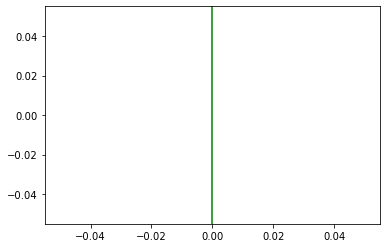

In [68]:
def compare(party1):
    y = []
    counter = 0
    keywords = ['vluchtelingen', 'vluchteling', 'immigranten', 'immigrant', 'asielzoekers', 'asielzoeker', 'Vluchtelingen', 'Vluchteling', 'Immigranten', 'Immigrant', 'Asielzoekers', 'Asielzoeker' ]
    for j in ['#reference', '#covid']:
        a = len(y)
        for i in teksten[j][party1]:
            try:
                if keywords in i:
                    y.append(sentiment(i)[0])
                    counter += 1
            except TypeError:
                pass

    plt.plot(y)
    plt.axvline(a,c='green',label='covid')
    x = []
    print('{} over {}'.format(party1,keywords))
    print(counter)
    print(np.std(y))
    for i in range(len(y)):
        x.append(i)
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    print(p)
    plt.plot(x,p(x),"r--")
    plt.show()

#keywords = ['vluchtelingen', 'vluchteling', 'immigranten', 'immigrant', 'asielzoekers', 'asielzoeker', 'Vluchtelingen', 'Vluchteling', 'Immigranten', 'Immigrant', 'Asielzoekers', 'Asielzoeker' ]
for i in partijen:
    compare(i)


Number of keywords: 6 

          Partij  Average sentiment keywords  Stdev sentiment keywords  \
0            VVD                    0.317616                  0.318733   
1             SP                    0.326922                  0.316272   
2           PvdA                    0.259231                  0.314068   
3            CDA                    0.271801                  0.274848   
4           PvdD                    0.255368                  0.241425   
5            PVV                    0.278307                  0.286301   
6     GroenLinks                    0.292825                  0.275542   
7            SGP                    0.371806                  0.282933   
8            D66                    0.306316                  0.291727   
9   ChristenUnie                    0.299185                  0.384942   
10        50PLUS                    0.281500                  0.387075   
11          DENK                    0.263957                  0.406308   
12           

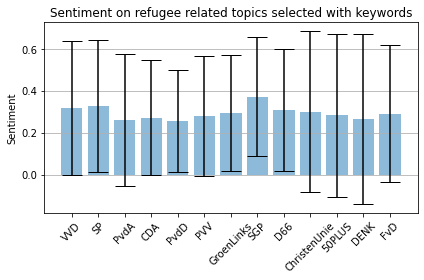

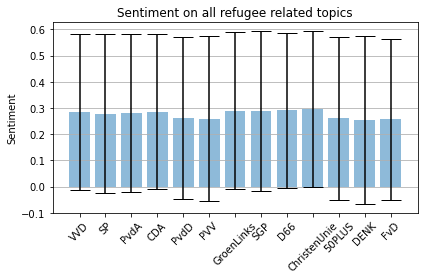

In [70]:
keywords = ['vluchtelingen', 'vluchteling', 'immigranten', 'immigrant', 'asielzoekers', 'asielzoeker']
print('\nNumber of keywords:', len(keywords),"\n")

# setting up empty lists for the x and y data
scores = []

for partij in partijen:
    # setting counters
    count1 = 0
    count2 = 0

    if partij in teksten['#covid']:
        # setting up empty lists for scores
        score1 = []
        score2 = []

        for tekst in teksten['#covid'][partij]:

            # ignoring none-types or other datatypes
            if isinstance(tekst, str):
                words = tekst.split()

                for word in words:
                    # removing punctuation
                    re.sub('[,\.!?]', '', word)
                    # setting words to lowercase
                    word.lower()

            # overall sentiment
            score2.append(sentiment(tekst))
            count2 += 1

            # focussing on keywords about covid-19
            check = any(item in words for item in keywords)

            if check == True:
                score1.append(sentiment(tekst))
                # checking number of tekst with keywords
                count1 += 1

        # checking per party
        scores.append([partij, np.mean(score1), np.std(score1), count1, np.mean(score2), np.std(score2), count2])

# df with data
df_sent = pd.DataFrame(scores, columns=['Partij', 'Average sentiment keywords','Stdev sentiment keywords', 'N keywords','Average sentiment', 'Stddev sentiment', 'N'])
print(df_sent)

# prep for plot
parties = [row[0] for row in scores]
x = np.arange(len(parties))

# plot of results of keyword related text
fig, ax = plt.subplots()
ax.bar(x, [row[1] for row in scores],
       yerr=[row[2] for row in scores],
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)

ax.set_ylabel('Sentiment')
ax.set_xticks(x)
ax.set_xticklabels(parties, rotation=45)
ax.set_title('Sentiment on refugee related topics selected with keywords')
ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig('plot_sent_key.png')

# plot of results of all covid related text
fig, ax = plt.subplots()
ax.bar(x, [row[4] for row in scores],
       yerr=[row[5] for row in scores],
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)

ax.set_ylabel('Sentiment')
ax.set_xticks(x)
ax.set_xticklabels(parties, rotation=45)
ax.set_title('Sentiment on all refugee related topics')
ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig('plot_sent_all.png')
plt.show()

## 6.3. Evaluation

### 6.3.1. Results

## 6.4. Discussion

### 6.4.1. Conclusion

### 6.4.2. Discussion results and suggestions future work

### 6.4.3. Lessons learned